In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm

In [2]:
df_trans = pd.read_parquet("../../data/transaction_df.parquet")

In [3]:
df_trans

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


In [4]:
cat_col = ["place", "product"]
num_col = ["price", "amount"]
time_col = ["datetime"]

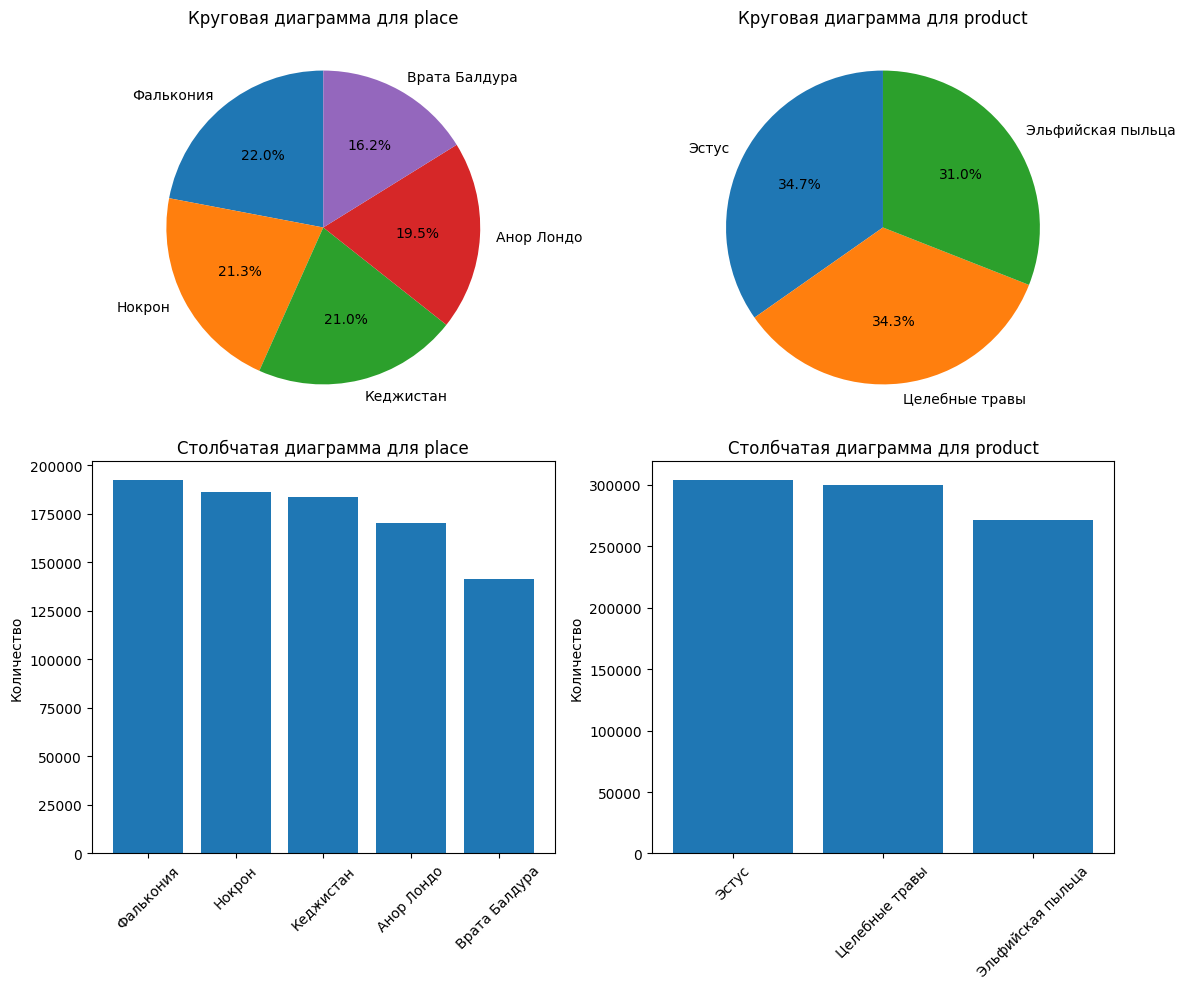

In [5]:
fig, axs = plt.subplots(2, len(cat_col), figsize=(6 * len(cat_col), 10))

for idx, col in enumerate(cat_col):
    value_counts = df_trans[col].value_counts()

    axs[0, idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0, idx].set_title(f'Круговая диаграмма для {col}')

    axs[1, idx].bar(value_counts.index, value_counts.values)
    axs[1, idx].set_title(f'Столбчатая диаграмма для {col}')
    axs[1, idx].set_ylabel('Количество')

    if idx == 0 or idx == len(cat_col) - 1:
        axs[1, idx].set_xticks(range(len(value_counts.index)))
        axs[1, idx].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

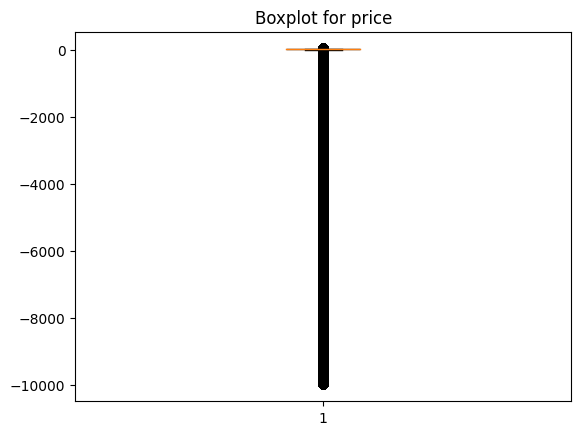

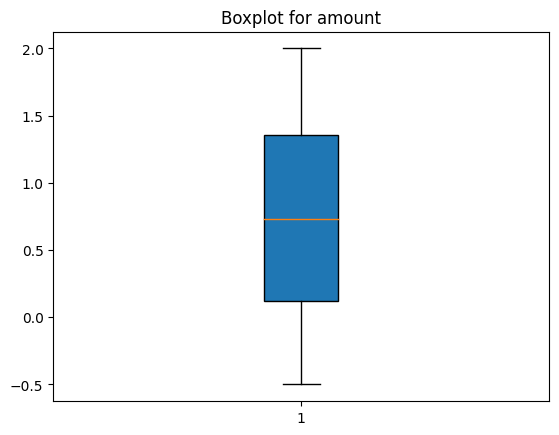

In [6]:
fig, ax = plt.subplots()
for col in num_col:
    plt.boxplot(df_trans[col], patch_artist=True)
    plt.title(f'Boxplot for {col}')
    plt.show()

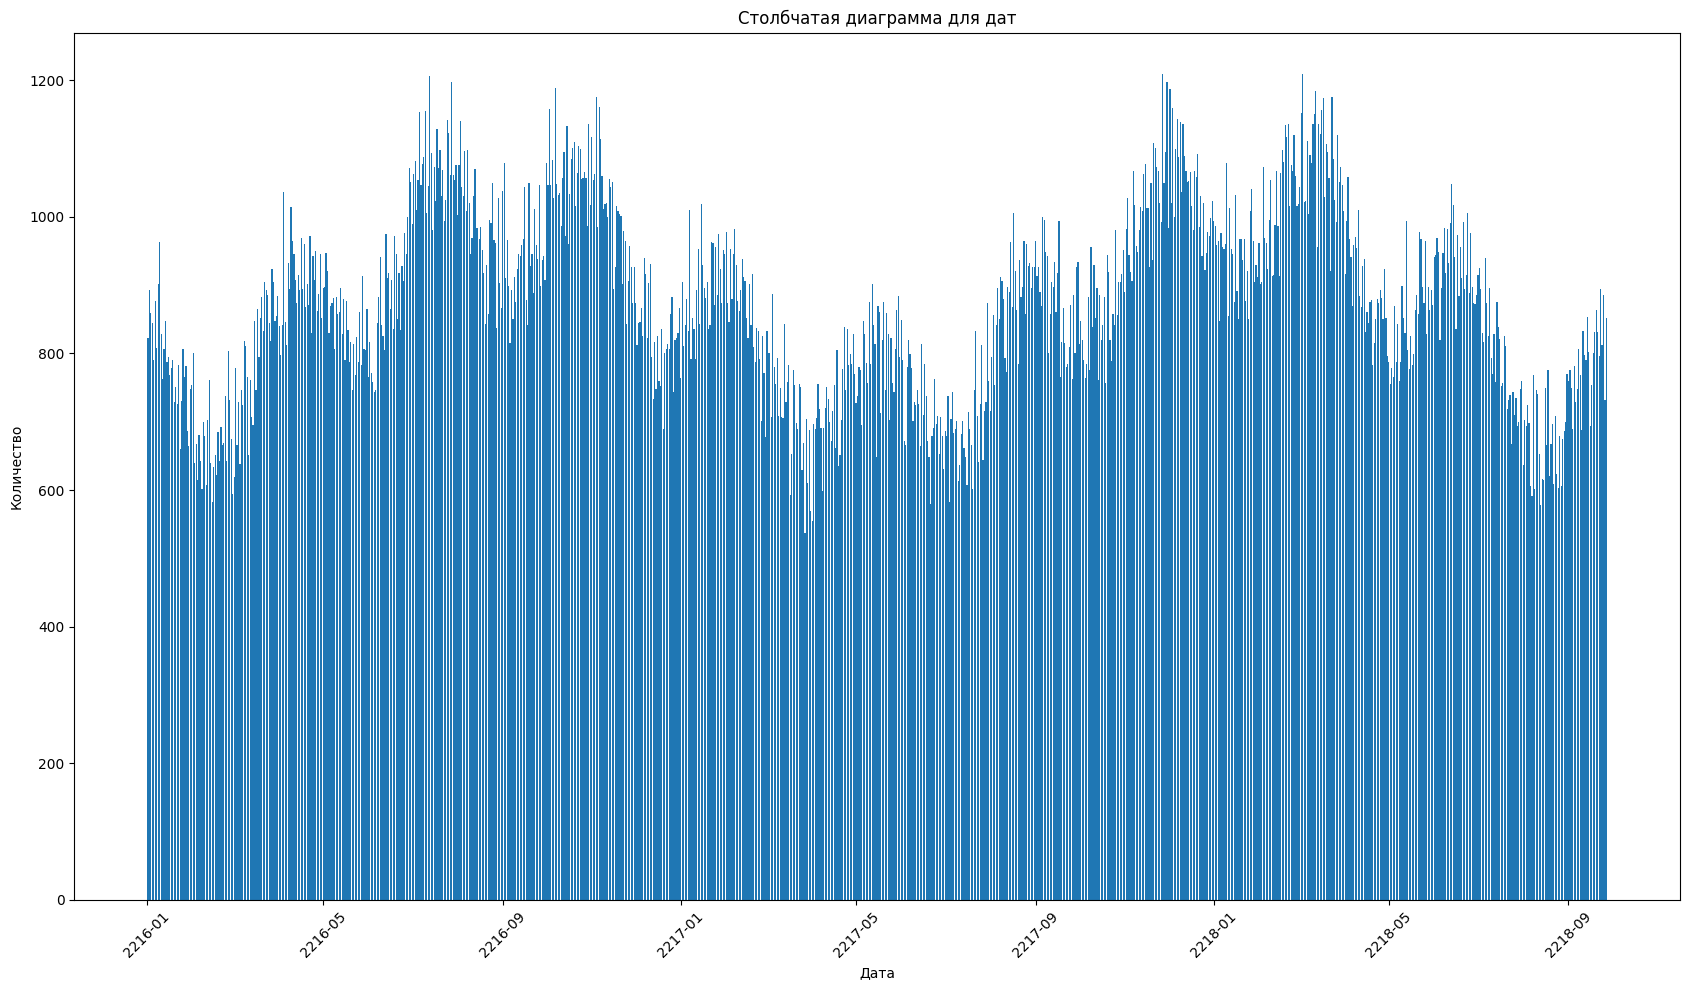

In [7]:
plt.figure(figsize=(17, 10))
value_counts = df_trans['datetime'].dt.normalize().value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.title(f'Столбчатая диаграмма для дат')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     874604 non-null  object        
 4   datetime  875036 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(2)
memory usage: 33.4+ MB


как видим, только беды с amount, price и place, исправим

In [9]:
df_trans.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


In [10]:
df_up = df_trans.loc[~df_trans["place"].isna(), ["product", "price", "place", "datetime"]].copy()

In [11]:
df_up.head()

,product,price,place,datetime
0,Целебные травы,3.9,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,Анор Лондо,2216-01-02 05:33:00


In [17]:
df_error = df_up[df_up["price"] <= 0]
df_not_error = df_up[df_up["price"] > 0]

In [19]:
df_error.head()

,product,price,place,datetime
5,Целебные травы,-7154.53,Анор Лондо,2216-01-02 13:57:00
40,Целебные травы,-8870.90,Анор Лондо,2216-01-02 16:02:00
55,Эльфийская пыльца,-1263.59,Анор Лондо,2216-01-02 05:26:00
58,Эльфийская пыльца,-1602.39,Анор Лондо,2216-01-02 18:44:00
93,Эльфийская пыльца,-8947.87,Анор Лондо,2216-01-02 05:26:00


In [31]:
prod, pric, plac, date = df_error.iloc[0]

In [32]:
prod, pric, plac, date

('Целебные травы', -7154.53, 'Анор Лондо', Timestamp('2216-01-02 13:57:00'))

In [39]:
date + pd.Timedelta(days=0)

Timestamp('2216-01-02 13:57:00')

Тк в один и тот же день цена не может измениться, то ее можно дозаполнить известным значением цены в этот день

In [58]:
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count

df_not_error.loc[:, 'date'] = df_not_error['datetime'].dt.strftime('%Y-%m-%d')

def fix_price(row):
    condition_df = df_not_error[
        (df_not_error["product"] == row["product"]) & 
        (df_not_error["place"] == row["place"]) & 
        (df_not_error["date"] == row["datetime"].strftime('%Y-%m-%d'))
    ]["price"]
    
    if len(condition_df) == 0:
        return row["price"]
    else:
        return condition_df.mode()[0]

def process_chunk(chunk):
    return chunk.apply(fix_price, axis=1)

def parallelize_dataframe(df, func, n_cores):
    df_split = np.array_split(df, n_cores)

    with Pool(n_cores) as pool:
        result = list(tqdm(pool.imap(func, df_split), total=len(df_split)))

    return pd.concat(result)

n_cores = cpu_count()
df_error['price'] = parallelize_dataframe(df_error, process_chunk, n_cores)

100%|██████████| 12/12 [22:55<00:00, 114.61s/it]  
/tmp/ipykernel_31402/3429183242.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error['price'] = parallelize_dataframe(df_error, process_chunk, n_cores)


In [61]:
df_error[df_error["price"] <= 0]

,product,price,place,datetime


все ок, отрицательного price yет

In [64]:
df_up[df_up["price"] <= 0] = df_error

In [67]:
df_trans.loc[~df_trans["place"].isna(), ["product", "price", "place", "datetime"]] = df_up

In [77]:
df_trans[df_trans["price"] <= 0]

,product,price,amount,place,datetime
8629,Эстус,-6687.99,-0.468309,None,2216-03-03 19:42:00
31840,Эстус,-4432.76,0.979284,None,2216-07-17 13:02:00
55313,Целебные травы,-3824.41,0.982179,None,2216-11-10 06:44:00
69019,Целебные травы,-7870.49,0.667009,None,2217-01-27 22:51:00
126810,Эстус,-5465.52,1.770178,None,2218-01-15 03:57:00
142001,Целебные травы,-2325.57,-0.154201,None,2218-04-01 19:46:00
156708,Эльфийская пыльца,-8389.08,0.039481,None,2218-06-24 04:34:00
163797,Целебные травы,-9468.47,0.459932,None,2218-08-10 15:22:00
221136,Эстус,-9503.95,0.840164,None,2216-11-20 23:18:00
288767,Эльфийская пыльца,-8728.50,0.545281,None,2218-03-20 15:39:00


видим, что price отрицательный только, где нет place. Исправим.
P.S.: гипотеза - если продукт, день одинаковые, значит и place одинаковый.

In [80]:
for i in df_trans[df_trans["price"] <= 0].index:
    if (df_trans.loc[i-1, "product"] == df_trans.loc[i, "product"]) and (df_trans.loc[i-1, "datetime"].strftime('%Y-%m-%d') == df_trans.loc[i, "datetime"].strftime('%Y-%m-%d')):
        df_trans.loc[i, "place"] = df_trans.loc[i-1, "place"]
        df_trans.loc[i, "price"] = df_trans.loc[i-1, "price"]
    elif (df_trans.loc[i+1, "product"] == df_trans.loc[i, "product"]) and (df_trans.loc[i+1, "datetime"].strftime('%Y-%m-%d') == df_trans.loc[i, "datetime"].strftime('%Y-%m-%d')):
        df_trans.loc[i, "place"] = df_trans.loc[i+1, "place"]
        df_trans.loc[i, "price"] = df_trans.loc[i+1, "price"]

In [81]:
df_trans[df_trans["price"] <= 0]

,product,price,amount,place,datetime


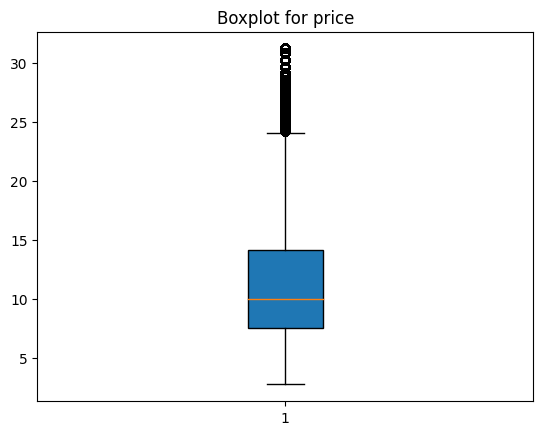

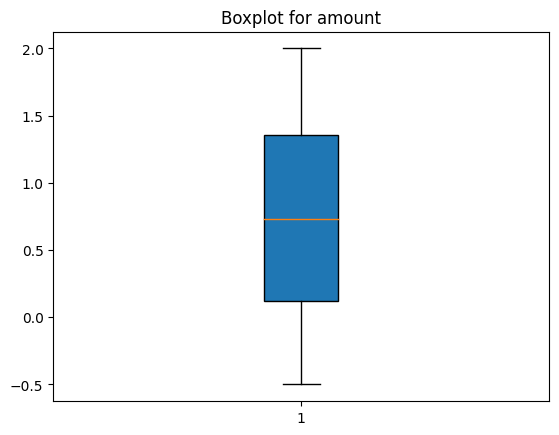

In [82]:
fig, ax = plt.subplots()
for col in num_col:
    plt.boxplot(df_trans[col], patch_artist=True)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [88]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875036 entries, 0 to 875035
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   product   875036 non-null  object        
 1   price     875036 non-null  float64       
 2   amount    875036 non-null  float64       
 3   place     875036 non-null  object        
 4   datetime  875036 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(2)
memory usage: 33.4+ MB


остался amount

In [89]:
len(df_trans[df_trans["amount"] < 0]) / len(df_trans)

0.2006306026266348

20% отрицательных amount...

In [90]:
df_trans[df_trans["amount"] < 0]

,product,price,amount,place,datetime
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
14,Целебные травы,3.90,-0.026968,Анор Лондо,2216-01-02 09:32:00
16,Целебные травы,3.90,-0.181400,Анор Лондо,2216-01-02 03:52:00
22,Целебные травы,3.90,-0.209384,Анор Лондо,2216-01-02 14:22:00
27,Целебные травы,3.90,-0.302981,Анор Лондо,2216-01-02 04:20:00
...,...,...,...,...,...
875019,Эстус,9.28,-0.139451,Фалькония,2218-09-27 18:30:00
875021,Эстус,9.28,-0.287133,Фалькония,2218-09-27 17:49:00
875027,Эстус,9.28,-0.006291,Фалькония,2218-09-27 23:25:00
875029,Эстус,9.28,-0.187556,Фалькония,2218-09-27 23:02:00


Исходя из данных, я не нашел методов подсчета amount, однако у меня появилась гипотеза: а вдруг, отрицательный amount - возврат в унциях данного товара, поэтому, возможно, это не аномалия, а вполне адекватное число...
Поэтому я пришел к выводу: сделать два датасета:
- С отрицательным amount
- Без оттрицательного amount

In [92]:
df_trans.to_parquet("../../data/df_end_transaction_ma.parquet")
df_trans[df_trans["amount"] >= 0].to_parquet("../../data/df_end_transaction.parquet")